# U.S. Medical Insurance Costs

We have a dataset of inusrance costs from X Insurance Company. We can analyze this data to draw some conclusions and learn more about how the company is performing, how it operates, and what it's standards are regarding different demographics.

Let's first load the data:

In [1]:
import pandas as pd

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

We now know the columns. Let's take a look at the difference between <strong>sex, smoker, and regions</strong>. We will look at columns with greater variance later.
Here is a visualization of the demographics mentioned

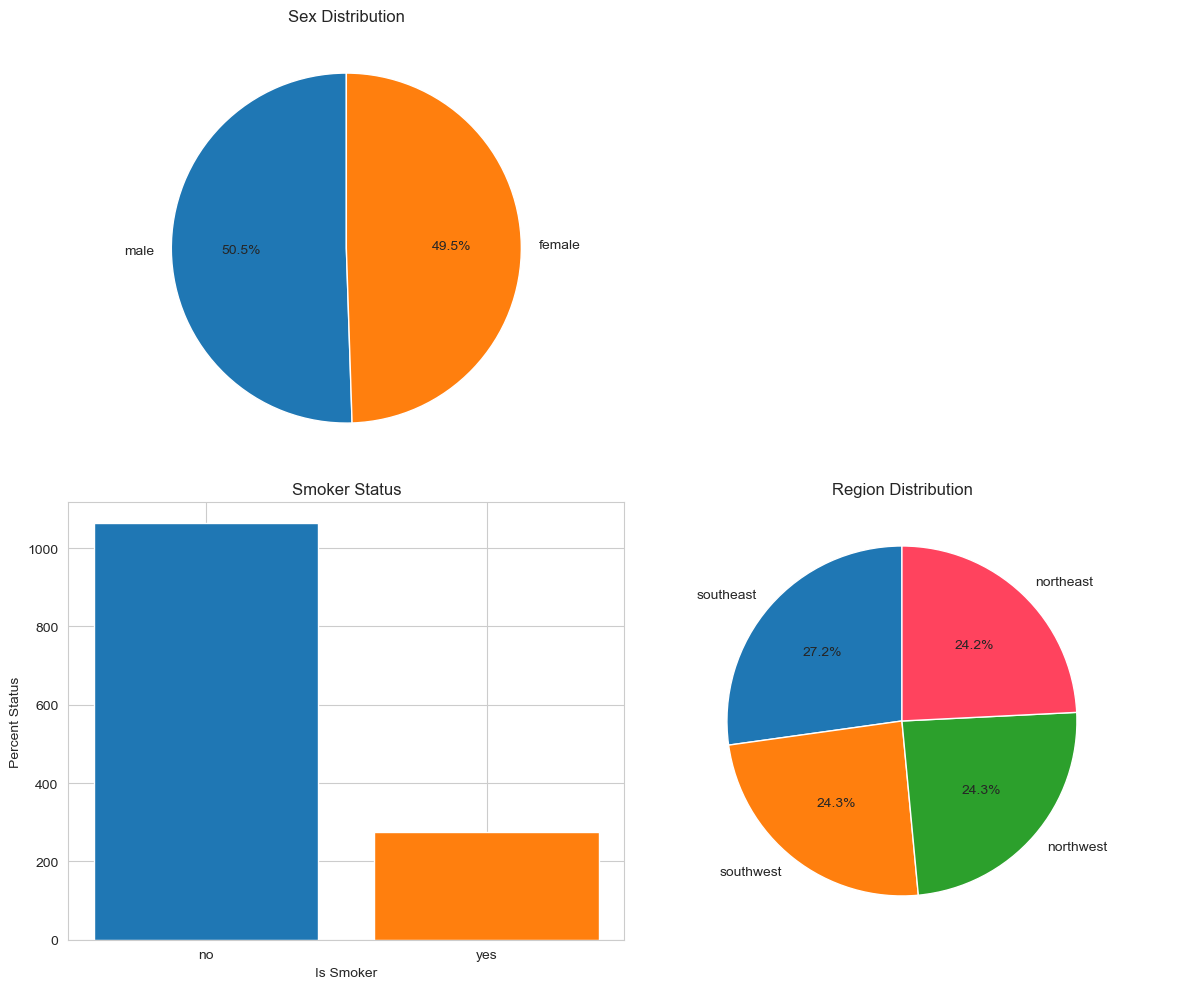

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("Set2") 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0,0].pie(data['sex'].value_counts().values, labels=data['sex'].value_counts().index,  autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e'])
axes[0,0].set_title("Sex Distribution")

axes[1,0].bar(data['smoker'].value_counts().index, data['smoker'].value_counts().values, color=['#1f77b4', '#ff7f0e'])
axes[1,0].set_title("Smoker Status")
axes[1,0].set_xlabel("Is Smoker")
axes[1,0].set_ylabel("Percent Status")

axes[1,1].pie(data['region'].value_counts().values, labels=data['region'].value_counts().index,  autopct='%1.1f%%', startangle=90, colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#ff435e'])
axes[1,1].set_title("Region Distribution")

axes[0, 1].axis("off")

plt.tight_layout()
plt.show()


Let's have a look at how age increases compared to charges:

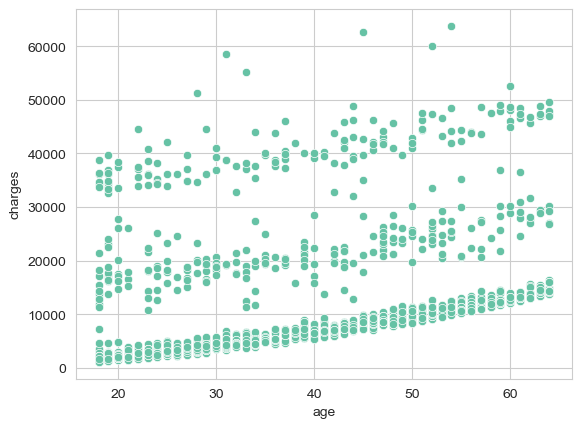

In [22]:
import warnings
warnings.filterwarnings("ignore")

sns.scatterplot(data=data, x="age", y="charges")
plt.show()

This doesn't tell us much. We can see a rough trend, but there is too much noise. Let's try taking out the smokers and those with a BMI above 25:

In [23]:
data_no_smoker_good_bmi = data[(data['smoker'] == 'no') & (data['bmi'] <= 25.0)]
data_no_smoker_good_bmi[['smoker', 'bmi']]

,smoker,bmi
3,no,22.705
15,no,24.600
17,no,23.845
26,no,23.085
28,no,17.385
...,...,...
1292,no,23.210
1295,no,22.000
1302,no,20.800
1316,no,20.600


Let's check again with our modified dataset:

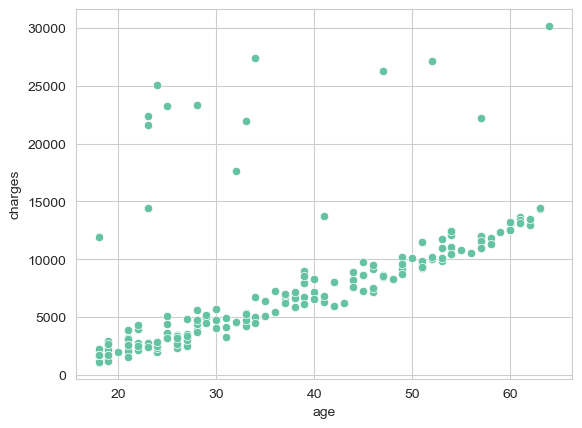

In [24]:
import warnings
warnings.filterwarnings("ignore")

sns.scatterplot(data=data_no_smoker_good_bmi, x="age", y="charges")
plt.show()

Nice! We see a much more visible trend. Obviously, being a smoker and having a high BMI increases your insurance charges, but so does age in general. Next, let's find the average age of a smoker and their demographic. This can tell X Insurance Company that this region should have high charges, as there are also high risks of second hand smoking there:

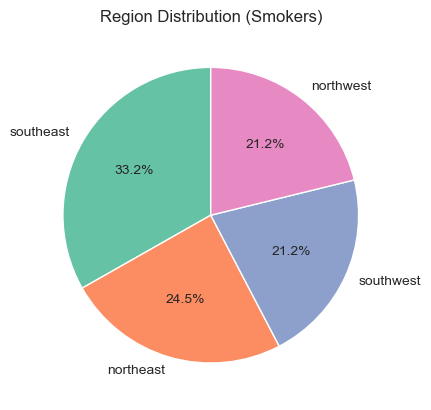

In [31]:
data_smokers = data[data['smoker'] == 'yes']

plt.pie(data_smokers['region'].value_counts().values, labels=data_smokers['region'].value_counts().index,  autopct='%1.1f%%', startangle=90)
plt.title("Region Distribution (Smokers)")

plt.show()


It is pretty clear that southeast has a fair bit more smokers than the rest of the regions. Let's see their average <strong> age, bmi, and children </strong>. Then, let's finally compare the regions in terms of <strong> average charges </strong>:

In [45]:
data_southeast = data[data['region'] == 'southeast']

average_age_se = sum(data_southeast['age'].values) / len(data_southeast)
average_bmi_se = sum(data_southeast['bmi'].values) / len(data_southeast)
average_children_se = sum(data_southeast['children'].values) / len(data_southeast)

average_age = sum(data['age'].values) / len(data)
average_bmi = sum(data['bmi'].values) / len(data)
average_children = sum(data['children'].values) / len(data)

print(f'In the southeast (the highest smoking area), the average age {average_age_se:2f},')
print(f'compared to the total average of {average_age:2f}, the average bmi in the southeast is {average_bmi_se:2f},') 
print(f'compared to the total average of {average_bmi:2f} and the average children in the southeast are {average_children_se:2f} compared to the total average of {average_children:2f}.')


In the southeast (the highest smoking area), the average age 38.939560,
compared to the total average of 39.207025, the average bmi in the southeast is 33.355989,
compared to the total average of 30.663397 and the average children in the southeast are 1.049451 compared to the total average of 1.094918.


<h3>Conclusions</h3>
It is apparent that an equal number of both sexes from a fair distribution of regions get insurance from X Insurance Company. It is also apparent that there is a trend between aging and higher charges. We also uncovered the region with the highest percentage of smokers - the southeast - and compared averages of the region across the data available. The averages did not produce interesting results other than the average person getting insurance is approaching their 40s, is overweight, and has a single child.